Moyenne surface: 72.1m², Écart-type: 25.65250514877959, Min: 9, Max: 126
 
Moyenne: 2013.02, Ancienne: 2005, Récente: 2024
 
Proportion avec balcon: 64.0%
 
normal    25
high      16
low        6
scam       3
Name: price_category, dtype: int64
 
Moyenne de chambre: 1.98, Médiane: 2.0, Variance: 0.8363265306122444, Écart-type: 0.914508901330241
 


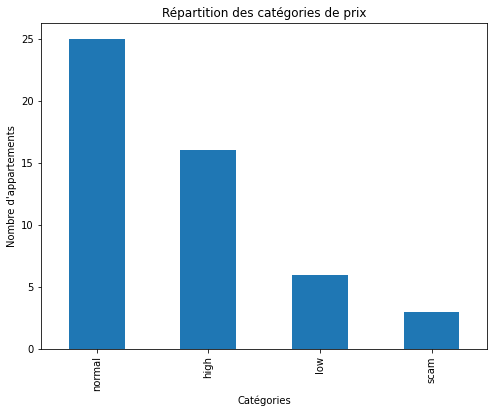

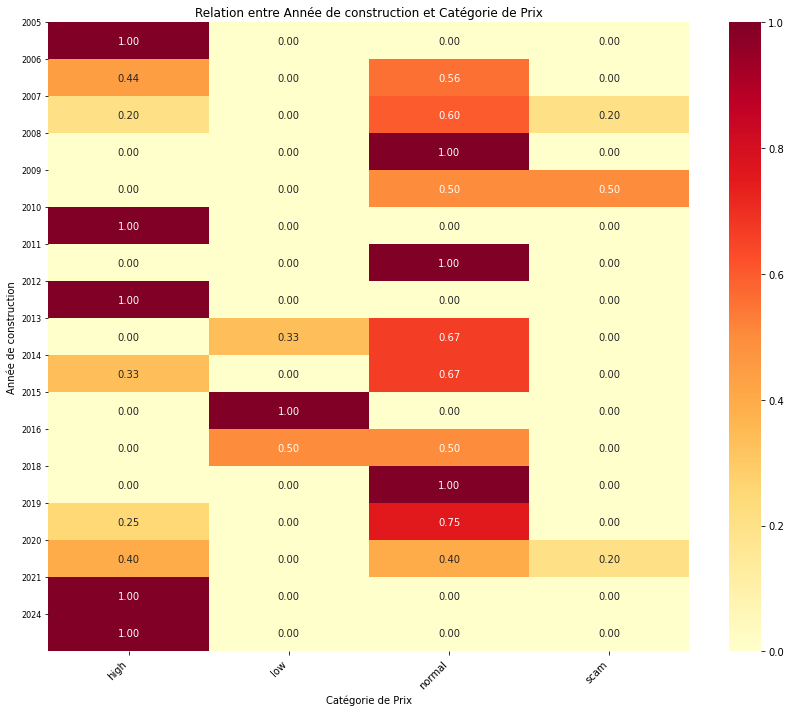

Regression linéaire ville surface prix -> note
R²: -0.46431257551521243, RMSE: 1.1856390987541716
 
Regression linéaire ville -> année construction
R²: -0.005520217001642402, RMSE: 5.1179880473573585
/!\ PROBLEME DE DONNEES ICI, A LA VUE DES RESULTATS JE PENSE QUE MES DONNEES NE SONT PAS PERTINENTES /!\
/!\ 1.18 RSME POUR UNE NOTE SUR 5 ET 5 DE RSME POUR UNE ECHELLE DE 20ANS  /!\
 
classification logistique
Accuracy: 0.7, Recall: 1.0, F1 Score: 0.8235294117647058
 
KNN
Accuracy: 0.6, Recall: 1.0, F1 Score: 0.7499999999999999
 
3.7
 Pour mes données la classification logistique me donne de meilleure résultat que le KNN, le recall du KNN est égale à celui de la classification logistique avec mes données. 
Cependant l'accuracy et le f1 score reste plus élevé sur la classification logistique


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_squared_error, r2_score
from flask import Flask, request, jsonify

df = pd.read_csv('appartements.csv')

df.head()


# SURFACE
#Moyenne + ecrat type + le plus petit + le plus grand
surface_mean = df['surface'].mean()
surface_std = df['surface'].std()
surface_min = df['surface'].min()
surface_max = df['surface'].max()
print(f"Moyenne surface: {surface_mean}m², Écart-type: {surface_std}, Min: {surface_min}, Max: {surface_max}")
print(" ")

# ANNEE
#Moyenne +  le plus recent + le plus vieux
anne_mean = df['annee_construction'].mean()
anne_min = df['annee_construction'].min()
anne_max = df['annee_construction'].max()
print(f"Moyenne: {anne_mean}, Ancienne: {anne_min}, Récente: {anne_max}")
print(" ")

# BALCON
# % d'appart avec un balcon 
balcon_proportion = df['balcon'].mean()  # 1 si balcon, 0 sinon
print(f"Proportion avec balcon: {balcon_proportion * 100}%")
print(" ")

# COMPTAGE / CATE
#Nombre d'appart par catégories
price_categories = df['price_category'].value_counts()
print(price_categories)
print(" ")

# CHAMBRES
# Moyenne + médiane + variance + écart-type du nbr de chambres
nb_rooms_mean = df['nbRooms'].mean()
nb_rooms_median = df['nbRooms'].median()
nb_rooms_variance = df['nbRooms'].var()
nb_rooms_std = df['nbRooms'].std()
print(f"Moyenne de chambre: {nb_rooms_mean}, Médiane: {nb_rooms_median}, Variance: {nb_rooms_variance}, Écart-type: {nb_rooms_std}")
print(" ")



# GRAPHIQUE
# Diagramme à barres
plt.figure(figsize=(8,6))
price_categories.plot(kind='bar')
plt.title('Répartition des catégories de prix')
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'appartements')
plt.show()

# BONUS
# heatmap
df['annee_construction'] = df['annee_construction'].round().astype(int)
# Création  table entre lex années de construction et la caté de prix
heatmap_data = pd.crosstab(df['annee_construction'], df['price_category'])
heatmap_data_norm = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Créer la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data_norm, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Relation entre Année de construction et Catégorie de Prix')
plt.xlabel('Catégorie de Prix')
plt.ylabel('Année de construction')

# Rotation des labels pour y voir qqch
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.yticks(range(len(heatmap_data_norm.index)), heatmap_data_norm.index, fontsize=8)
plt.tight_layout()
plt.show()



#3.2
#Regression linéaire
X = df[['city', 'surface', 'price']]
y = df['note']

X = pd.get_dummies(X, columns=['city'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Regression linéaire ville surface prix -> note")
print(f"R²: {r2}, RMSE: {rmse}")
print(" ")



# 3.3
X = df[['city']]
y = df['annee_construction']

X = pd.get_dummies(X, columns=['city'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Regression linéaire ville -> année construction")
print(f"R²: {r2}, RMSE: {rmse}")
 
print("/!\\ PROBLEME DE DONNEES ICI, A LA VUE DES RESULTATS JE PENSE QUE MES DONNEES NE SONT PAS PERTINENTES /!\\")
print("/!\\ 1.18 RSME POUR UNE NOTE SUR 5 ET 5 DE RSME POUR UNE ECHELLE DE 20ANS  /!\\")

print(" ")
# 3.4
#LOGISTIQUE
X = df[['price', 'city']]
y = df['garage']  # 1 si garage, 0 sinon

X = pd.get_dummies(X, columns=['city'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de classification logistique
logistic_model = LogisticRegression(max_iter=200, class_weight='balanced')
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#3.6
print("classification logistique")
print(f"Accuracy: {accuracy}, Recall: {recall}, F1 Score: {f1}")
print(" ")


#3.5 
#KNN
X = df[['price', 'city']]
y = df['balcon']  # 1 si balcon, 0 sinon
X = pd.get_dummies(X, columns=['city'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#3.6
print("KNN")
print(f"Accuracy: {accuracy}, Recall: {recall}, F1 Score: {f1}")
print(" ")

print("3.7")
print(" Pour mes données la classification logistique me donne de meilleure résultat que le KNN, le recall du KNN est égale à celui de la classification logistique avec mes données. ")
print("Cependant l'accuracy et le f1 score reste plus élevé sur la classification logistique")

#3.7
# Pour mes données la classification logistique me donne de meilleure résultat que le KNN, le recall du KNN est égale à celui de la classification logistique avec mes données.
# Cependant l'accuracy et le f1 score reste plus élevé sur la classification logistique. 